# Galaxy Clustering

## Eliana Bonalde
## Lizeth Daniela Jaimes


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from mpl_toolkits import mplot3d
from random import sample 
import seaborn as sns
from timeit import default_timer 
import time
import random
random.seed(1)
%matplotlib inline

La idea es observar cómo las funciones $G(r)$, $F(r)$ y $J(r)$ dependen de las características de agrupamiento de puntos. Por lo tanto, se generarán puntos que forman varios grupos en presencia de ruidos (es decir, puntos aleatorios de Poisson) en una región de interés para poder calcular estas tres funciones.

In [2]:
N,n,nsample = 2500,50,50
int1,int2 = 24,24
xdata = np.random.uniform(-int1,int1,N)
ydata = np.random.uniform(-int2,int2,N)
xcenters = np.random.uniform(-int1,int1,n)
ycenters = np.random.uniform(-int2,int2,n)
xsample = np.random.choice(xdata, nsample)
ysample = np.random.choice(ydata, nsample)

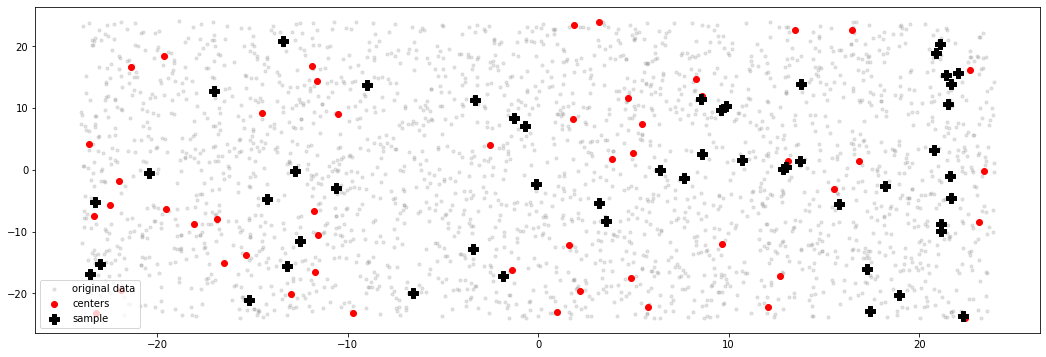

In [3]:
plt.figure(figsize=(18,6))
plt.scatter(xdata, ydata, label="original data", color='grey', alpha=0.2, s=10)
plt.scatter(xcenters, ycenters, label="centers", color='r')
plt.scatter(xsample, ysample, label="sample", color='k', marker='P', s=100)
plt.legend()
plt.show()

In [4]:
A = np.transpose(np.array([xdata, ydata]))
B = np.transpose(np.array([xcenters, ycenters]))
C = np.transpose(np.array([xsample, ysample]))

La función de distribución de contacto esférico $F(r)$ es la función de distribución de la distancia $r$ de un punto arbitrario en el espacio (no necesariamente existente en los datos) al punto más cercano en los datos.

In [5]:
m = len(A)
n = len(B)
dist_f = np.zeros((n,m))
for j in range(0,n):
    d = np.sqrt((B[j,0]-A[:,0])**2+(B[j,1]-A[:,1])**2)
    dist_f[j,:] = d
    
dist_f = dist_f.flatten()    
print(dist_f, len(dist_f))

[16.15577678  9.53056905 32.89083749 ... 24.93317082 15.9499008
 22.46654855] 125000


La función del vecino más cercano $G(r)$ es la función de distribución de la distancia $r$ de un punto (existente en los datos) al otro punto más cercano.

In [6]:
m = len(A)
h = len(C)
dist_g = np.zeros((h,m))
for j in range(0,h):
    d = np.sqrt((C[j,0]-A[:,0])**2+(C[j,1]-A[:,1])**2)
    dist_g[j,:] = d
    
dist_g = dist_g.flatten()    
print(dist_g, len(dist_g))

[34.92427961 20.84557322 28.83816201 ... 16.10423622 35.43641709
  5.36033538] 125000


In [7]:
dist_f.min(), dist_f.max(), dist_g.min(), dist_g.max(), np.count_nonzero(dist_f)

(0.03332482072402404,
 66.27042243324787,
 0.021222367393519903,
 66.00049447586454,
 125000)

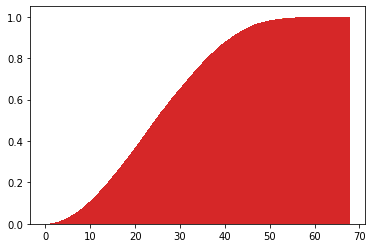

In [8]:
rs_f = plt.hist(dist_f, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[1]
F_r = plt.hist(dist_f, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[0]
rs_g = plt.hist(dist_g, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[1]
G_r = plt.hist(dist_g, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[0]

La función $J(r)$, sugerida por van Lieshout y Baddeley está definida como: $J(r)=\frac{1-G (r)}{1-F(r)}$, la cual es una buena prueba no paramétrica para determinar si los datos provienen de un proceso de Poisson.

In [9]:
J_r=(1-G_r)/(1-F_r)

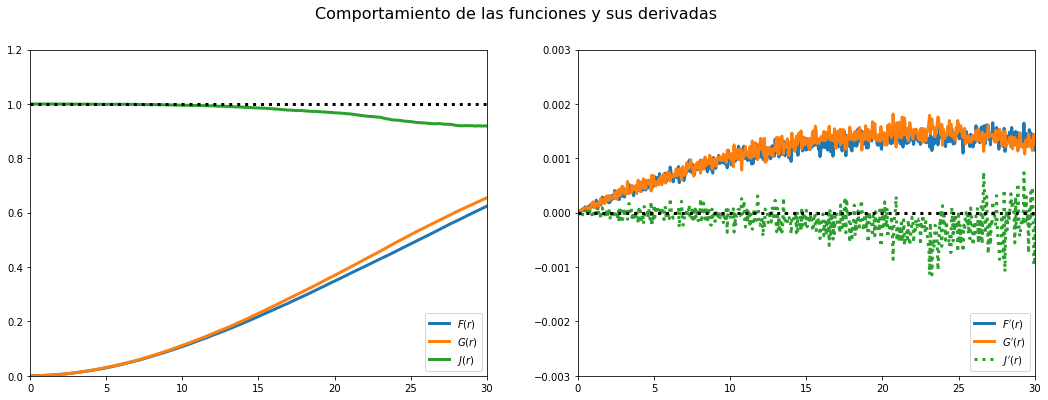

In [10]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(rs_f[:-1], F_r,label=r"$F(r)$", lw=3)
plt.plot(rs_g[:-1], G_r,label=r"$G(r)$", lw=3)
plt.plot(rs_f[:-1], J_r,label=r"$J(r)$", lw=3)
plt.axhline(1,lw=3, linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(0,1.2)
plt.legend(loc=4)

plt.subplot(1,2,2)
plt.plot(rs_f[:-2], np.diff(F_r), label=r"$F'(r)$", lw=3)
plt.plot(rs_g[:-2], np.diff(G_r), label=r"$G'(r)$", lw=3)
plt.plot(rs_f[:-2], np.diff(J_r), label=r"$J'(r)$", linestyle=':', lw=3)
plt.axhline(0, lw=3, linestyle=':', color='k')
plt.xlim(0, 30)
plt.ylim(-0.003, 0.003)
plt.legend(loc=4)

plt.suptitle('Comportamiento de las funciones y sus derivadas', fontsize=16)
plt.show()

In [11]:
circle_r = 4
circle_x = np.array([-20,-10,20,5,-3])
circle_y = np.array([10,-10,0,-18,12])

In [12]:
x_poisson,y_poisson = [],[]
for i, j in zip(circle_x, circle_y):
    alpha = 2 * np.pi * np.random.random(3500)
    r = circle_r * np.random.random(3500)
    x1 = r * np.cos(alpha) + i
    y1 = r * np.sin(alpha) + j
    x_poisson.append(x1)
    y_poisson.append(y1)
x_poisson, y_poisson = np.array(x_poisson), np.array(y_poisson)

In [13]:
xdata_new = np.concatenate((xdata, x_poisson[0], x_poisson[1], x_poisson[2], x_poisson[3], x_poisson[4]))
ydata_new = np.concatenate((ydata, y_poisson[0], y_poisson[1], y_poisson[2], y_poisson[3], y_poisson[4]))

D = np.transpose(np.array([xdata_new, ydata_new]))

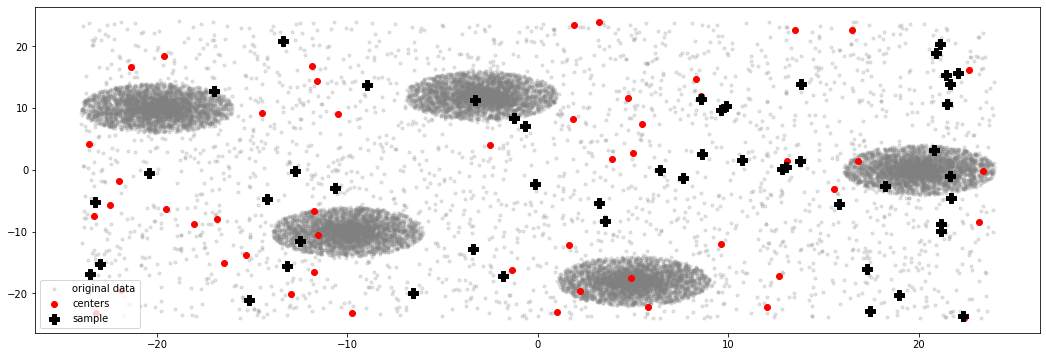

In [14]:
plt.figure(figsize=(18,6))
plt.scatter(xdata_new, ydata_new, label="original data", color='grey',alpha=0.2,s=10)
plt.scatter(xcenters, ycenters, label="centers", color='r')
plt.scatter(xsample, ysample, label="sample", color='k', marker='P', s=100)
plt.legend()
plt.show()

In [15]:
k = len(D)
n = len(B)
dist_f_new = np.zeros((n,k))
for j in range(0,n):
    d = np.sqrt((B[j,0]-D[:,0])**2+(B[j,1]-D[:,1])**2)
    dist_f_new[j,:] = d
    
dist_f_new = dist_f_new.flatten()    
 
print(dist_f_new, len(dist_f_new))

[16.15577678  9.53056905 32.89083749 ... 11.82733436 12.27434494
 12.9497306 ] 1000000


In [16]:
k = len(D)
h = len(C)
dist_g_new = np.zeros((h,k))
for j in range(0,h):
    d = np.sqrt((C[j,0]-D[:,0])**2+(C[j,1]-D[:,1])**2)
    dist_g_new[j,:] = d
    
dist_g_new = dist_g_new.flatten()    
 
print(dist_g_new, len(dist_g_new))

[34.92427961 20.84557322 28.83816201 ... 26.80586818 25.49858003
 25.47673661] 1000000


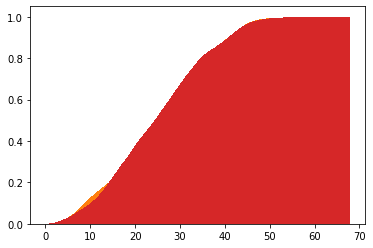

In [17]:
rs_f_new = plt.hist(dist_f_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[1]
F_r_new = plt.hist(dist_f_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[0]
rs_g_new = plt.hist(dist_g_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[1]
G_r_new = plt.hist(dist_g_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[0]

In [18]:
J_r_new = (1-G_r_new)/(1-F_r_new)

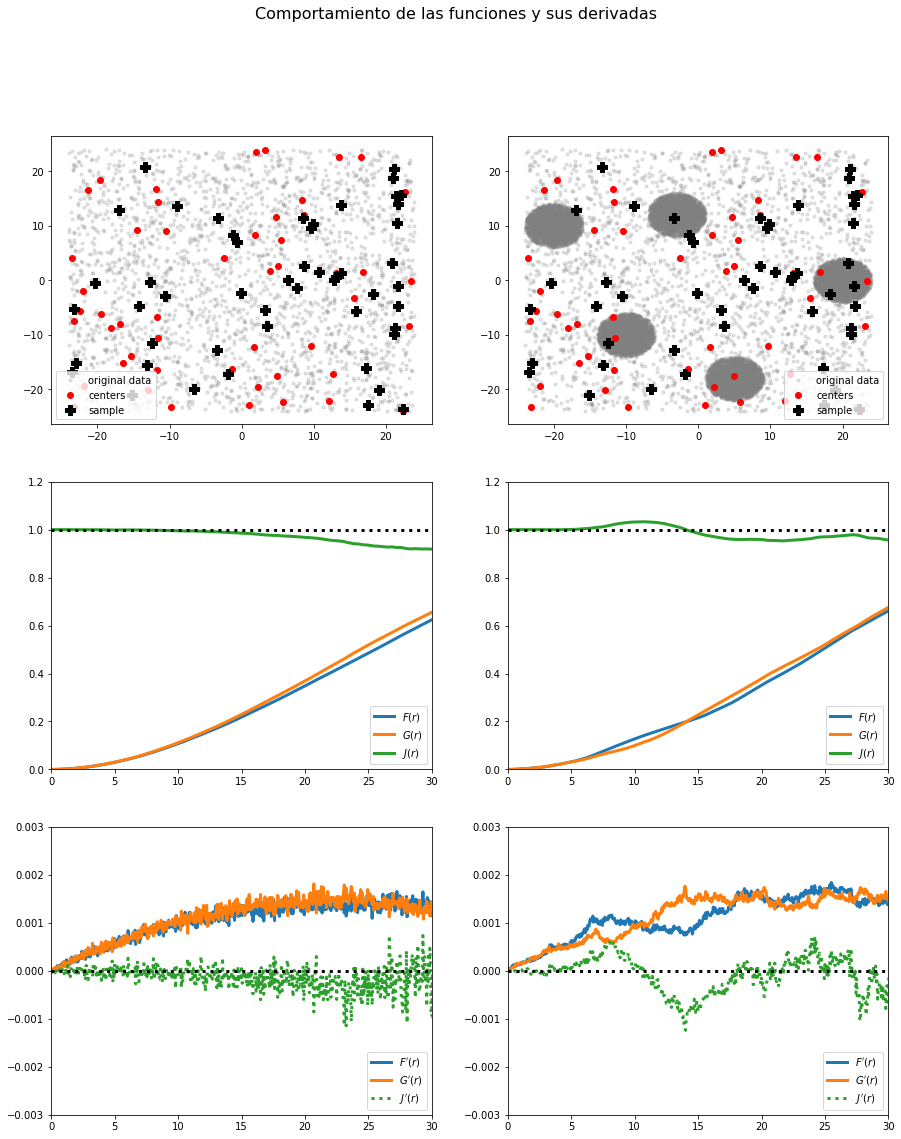

In [19]:
plt.figure(figsize=(15,18))
plt.subplot(3,2,1)
plt.scatter(xdata, ydata, label="original data", color='grey', alpha=0.2, s=10)
plt.scatter(xcenters, ycenters, label="centers", color='r')
plt.scatter(xsample, ysample, label="sample", color='k', marker='P', s=100)
plt.legend()

plt.subplot(3,2,3)
plt.plot(rs_f[:-1], F_r,label=r"$F(r)$", lw=3)
plt.plot(rs_g[:-1], G_r,label=r"$G(r)$", lw=3)
plt.plot(rs_f[:-1], J_r,label=r"$J(r)$", lw=3)
plt.axhline(1,lw=3,linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(0,1.2)
plt.legend(loc=4)

plt.subplot(3,2,5)
plt.plot(rs_f[:-2], np.diff(F_r), label=r"$F'(r)$", lw=3)
plt.plot(rs_g[:-2], np.diff(G_r), label=r"$G'(r)$", lw=3)
plt.plot(rs_f[:-2], np.diff(J_r), label=r"$J'(r)$", linestyle=':', lw=3)
plt.axhline(0,lw=3, linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(-0.003,0.003)
plt.legend(loc=4)

plt.subplot(3,2,2)
plt.scatter(xdata_new, ydata_new, label="original data", color='grey', alpha=0.2, s=10)
plt.scatter(xcenters, ycenters, label="centers", color='r')
plt.scatter(xsample, ysample, label="sample", color='k', marker='P', s=100)
plt.legend()

plt.subplot(3,2,4)
plt.plot(rs_f_new[:-1], F_r_new, label=r"$F(r)$", lw=3)
plt.plot(rs_g_new[:-1], G_r_new, label=r"$G(r)$", lw=3)
plt.plot(rs_f_new[:-1], J_r_new, label=r"$J(r)$", lw=3)
plt.axhline(1,lw=3, linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(0,1.2)
plt.legend(loc=4)

plt.subplot(3,2,6)
plt.plot(rs_f_new[:-2], np.diff(F_r_new), label=r"$F'(r)$", lw=3)
plt.plot(rs_g_new[:-2], np.diff(G_r_new), label=r"$G'(r)$", lw=3)
plt.plot(rs_f_new[:-2], np.diff(J_r_new), label=r"$J'(r)$", linestyle=':', lw=3)
plt.axhline(0, lw=3, linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(-0.003,0.003)
plt.legend(loc=4)


plt.suptitle('Comportamiento de las funciones y sus derivadas', fontsize=16)
plt.show()

In [20]:
xx_poisson, yy_poisson = [],[]
for i, j in zip(circle_x, circle_y):
    alpha1 = 12 * np.pi * np.random.random(3500)
    r = circle_r * np.random.random(3500)
    x11 = r * np.sin(np.sqrt(alpha1)) + i
    y11 = r * np.cos(alpha1) + j
    xx_poisson.append(x11)
    yy_poisson.append(y11)
    
xx_poisson, yy_poisson = np.array(xx_poisson), np.array(yy_poisson)

In [21]:
xxdata_new = np.concatenate((xdata, xx_poisson[0], xx_poisson[1], xx_poisson[2], xx_poisson[3], xx_poisson[4]))
yydata_new = np.concatenate((ydata, yy_poisson[0], yy_poisson[1], yy_poisson[2], yy_poisson[3], yy_poisson[4]))

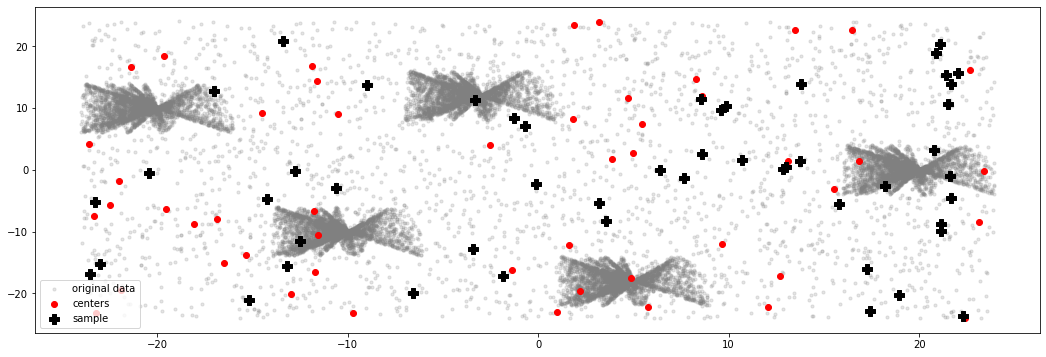

In [22]:
plt.figure(figsize=(18,6))
plt.scatter(xxdata_new, yydata_new, label="original data", color='grey', alpha=0.2, s=10)
plt.scatter(xcenters, ycenters, label="centers", color='r')
plt.scatter(xsample, ysample, label="sample", color='k', marker='P', s=100)
plt.legend()
plt.show()

In [23]:
E = np.transpose(np.array([xxdata_new, yydata_new]))

s = len(E)
n = len(B)
dist_ff_new = np.zeros((n,s))
for j in range(0,n):
    d = np.sqrt((B[j,0]-E[:,0])**2+(B[j,1]-E[:,1])**2)
    dist_ff_new[j,:] = d
    
dist_ff_new = dist_ff_new.flatten()    
 
print(dist_ff_new, len(dist_ff_new))

[16.15577678  9.53056905 32.89083749 ... 11.90328199 11.15242932
 11.72668022] 1000000


In [24]:
s = len(E)
h = len(C)
dist_gg_new = np.zeros((h,s))
for j in range(0,h):
    d = np.sqrt((C[j,0]-E[:,0])**2+(C[j,1]-E[:,1])**2)
    dist_gg_new[j,:] = d
    
dist_gg_new = dist_gg_new.flatten()    
 
print(dist_gg_new, len(dist_gg_new))

[34.92427961 20.84557322 28.83816201 ... 25.31581073 23.6603357
 26.12236116] 1000000


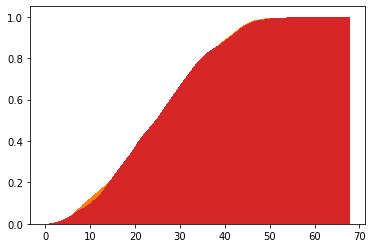

In [25]:
rs_ff_new = plt.hist(dist_ff_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[1]
F_rr_new = plt.hist(dist_ff_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[0]
rs_gg_new = plt.hist(dist_gg_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[1]
G_rr_new = plt.hist(dist_gg_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[0]

In [26]:
J_rr_new = (1-G_rr_new)/(1-F_rr_new)

In [27]:
xxx_poisson,yyy_poisson = [],[]
for i, j in zip(circle_x, circle_y):
    # random angle
    alpha2 = 1000 * np.pi * np.random.random(3500)
    # random radius
    r = circle_r * np.random.random(3500)
    x111 = r * 1.5*np.sin(np.sqrt(0.6*alpha2)) + i
    y111 = r * 1.5*np.cos(0.5*alpha2) + j
    xxx_poisson.append(x111)
    yyy_poisson.append(y111)
    
xxx_poisson, yyy_poisson = np.array(xxx_poisson), np.array(yyy_poisson)

In [28]:
xxxdata_new = np.concatenate((xdata, xxx_poisson[0], xxx_poisson[1], xxx_poisson[2], xxx_poisson[3], xxx_poisson[4]))
yyydata_new = np.concatenate((ydata, yyy_poisson[0], yyy_poisson[1], yyy_poisson[2], yyy_poisson[3], yyy_poisson[4]))

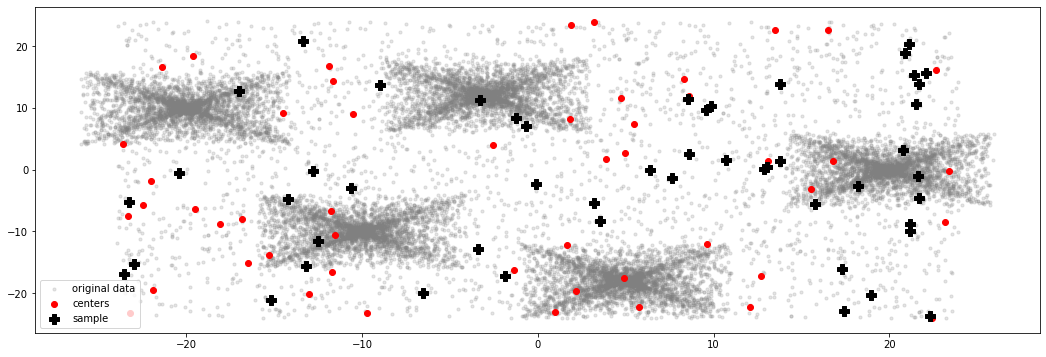

In [29]:
plt.figure(figsize=(18,6))
plt.scatter(xxxdata_new, yyydata_new, label="original data", color='grey', alpha=0.2, s=10)
plt.scatter(xcenters, ycenters, label="centers", color='r')
plt.scatter(xsample, ysample, label="sample", color='k', marker='P', s=100)
plt.legend()
plt.show()

In [30]:
F = np.transpose(np.array([xxxdata_new, yyydata_new]))

s = len(F)
n = len(B)
dist_fff_new = np.zeros((n,s))
for j in range(0,n):
    d = np.sqrt((B[j,0]-F[:,0])**2+(B[j,1]-F[:,1])**2)
    dist_fff_new[j,:] = d
    
dist_fff_new = dist_fff_new.flatten()    
 
print(dist_fff_new, len(dist_fff_new))

[16.15577678  9.53056905 32.89083749 ... 11.18698446  9.69244304
 10.79796449] 1000000


In [31]:
s = len(F)
h = len(C)
dist_ggg_new = np.zeros((h,s))
for j in range(0,h):
    d = np.sqrt((C[j,0]-F[:,0])**2+(C[j,1]-F[:,1])**2)
    dist_ggg_new[j,:] = d
    
dist_ggg_new = dist_ggg_new.flatten()    
 
print(dist_ggg_new, len(dist_ggg_new))

[34.92427961 20.84557322 28.83816201 ... 24.696441   28.11226647
 24.98156607] 1000000


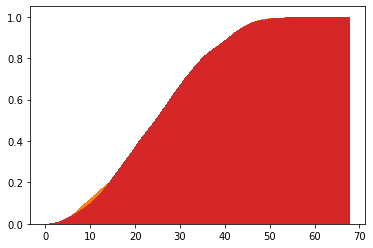

In [32]:
rs_fff_new = plt.hist(dist_fff_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[1]
F_rrr_new = plt.hist(dist_fff_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[0]
rs_ggg_new = plt.hist(dist_ggg_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[1]
G_rrr_new = plt.hist(dist_ggg_new, cumulative=True, density=True, bins=np.arange(0,np.sqrt((2*int1)**2+(2*int2)**2),0.05))[0]

In [33]:
J_rrr_new = (1-G_rrr_new)/(1-F_rrr_new)

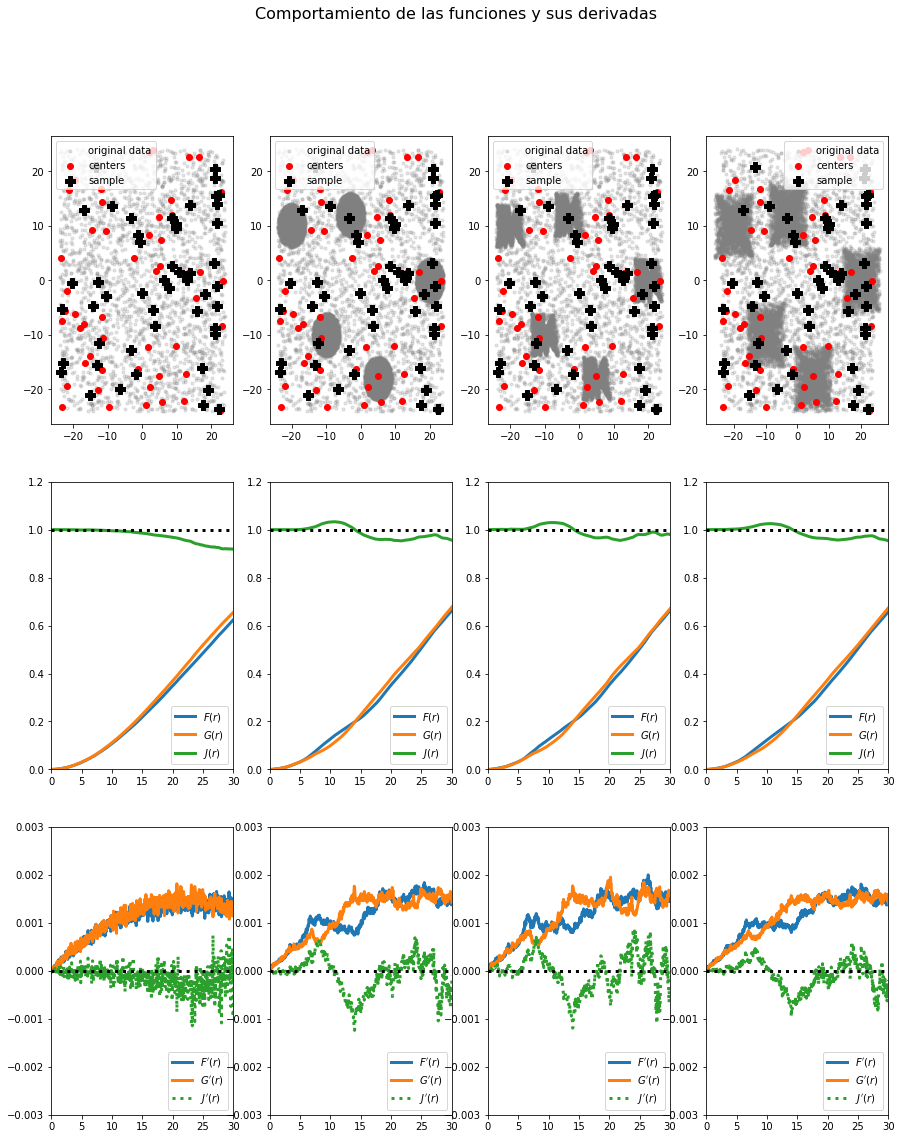

In [34]:
plt.figure(figsize=(15,18))
plt.subplot(3,4,1)
plt.scatter(xdata, ydata, label="original data", color='grey', alpha=0.2, s=10)
plt.scatter(xcenters, ycenters, label="centers", color='r')
plt.scatter(xsample, ysample, label="sample", color='k', marker='P', s=100)
plt.legend()

plt.subplot(3,4,2)
plt.scatter(xdata_new, ydata_new, label="original data", color='grey', alpha=0.2, s=10)
plt.scatter(xcenters, ycenters, label="centers", color='r')
plt.scatter(xsample, ysample, label="sample", color='k', marker='P', s=100)
plt.legend()

plt.subplot(3,4,3)
plt.scatter(xxdata_new, yydata_new, label="original data", color='grey', alpha=0.2, s=10)
plt.scatter(xcenters, ycenters, label="centers", color='r')
plt.scatter(xsample, ysample, label="sample", color='k', marker='P', s=100)
plt.legend()

plt.subplot(3,4,4)
plt.scatter(xxxdata_new, yyydata_new, label="original data", color='grey', alpha=0.2, s=10)
plt.scatter(xcenters, ycenters, label="centers", color='r')
plt.scatter(xsample, ysample, label="sample", color='k', marker='P', s=100)
plt.legend()

plt.subplot(3,4,5)
plt.plot(rs_f[:-1], F_r, label=r"$F(r)$", lw=3)
plt.plot(rs_g[:-1], G_r, label=r"$G(r)$", lw=3)
plt.plot(rs_f[:-1], J_r, label=r"$J(r)$", lw=3)
plt.axhline(1,lw=3,linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(0,1.2)
plt.legend(loc=4)


plt.subplot(3,4,6)
plt.plot(rs_f_new[:-1], F_r_new, label=r"$F(r)$", lw=3)
plt.plot(rs_g_new[:-1], G_r_new, label=r"$G(r)$", lw=3)
plt.plot(rs_f_new[:-1], J_r_new, label=r"$J(r)$", lw=3)
plt.axhline(1,lw=3, linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(0,1.2)
plt.legend(loc=4)

plt.subplot(3,4,7)
plt.plot(rs_ff_new[:-1], F_rr_new, label=r"$F(r)$", lw=3)
plt.plot(rs_gg_new[:-1], G_rr_new, label=r"$G(r)$", lw=3)
plt.plot(rs_ff_new[:-1], J_rr_new, label=r"$J(r)$", lw=3)
plt.axhline(1,lw=3, linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(0,1.2)
plt.legend(loc=4)

plt.subplot(3,4,8)
plt.plot(rs_fff_new[:-1], F_rrr_new, label=r"$F(r)$", lw=3)
plt.plot(rs_ggg_new[:-1], G_rrr_new, label=r"$G(r)$", lw=3)
plt.plot(rs_fff_new[:-1], J_rrr_new, label=r"$J(r)$", lw=3)
plt.axhline(1,lw=3, linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(0,1.2)
plt.legend(loc=4)

plt.subplot(3,4,9)
plt.plot(rs_f[:-2], np.diff(F_r), label=r"$F'(r)$", lw=3)
plt.plot(rs_g[:-2], np.diff(G_r), label=r"$G'(r)$", lw=3)
plt.plot(rs_f[:-2], np.diff(J_r), label=r"$J'(r)$", linestyle=':', lw=3)
plt.axhline(0,lw=3, linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(-0.003,0.003)
plt.legend(loc=4)


plt.subplot(3,4,10)
plt.plot(rs_f_new[:-2], np.diff(F_r_new), label=r"$F'(r)$", lw=3)
plt.plot(rs_g_new[:-2], np.diff(G_r_new), label=r"$G'(r)$", lw=3)
plt.plot(rs_f_new[:-2], np.diff(J_r_new), label=r"$J'(r)$", linestyle=':', lw=3)
plt.axhline(0, lw=3, linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(-0.003,0.003)
plt.legend(loc=4)


plt.subplot(3,4,11)
plt.plot(rs_ff_new[:-2], np.diff(F_rr_new), label=r"$F'(r)$", lw=3)
plt.plot(rs_gg_new[:-2], np.diff(G_rr_new), label=r"$G'(r)$", lw=3)
plt.plot(rs_ff_new[:-2], np.diff(J_rr_new), label=r"$J'(r)$", linestyle=':', lw=3)
plt.axhline(0, lw=3, linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(-0.003,0.003)
plt.legend(loc=4)

plt.subplot(3,4,12)
plt.plot(rs_fff_new[:-2], np.diff(F_rrr_new), label=r"$F'(r)$", lw=3)
plt.plot(rs_ggg_new[:-2], np.diff(G_rrr_new), label=r"$G'(r)$", lw=3)
plt.plot(rs_fff_new[:-2], np.diff(J_rrr_new), label=r"$J'(r)$", linestyle=':', lw=3)
plt.axhline(0, lw=3, linestyle=':', color='k')
plt.xlim(0,30)
plt.ylim(-0.003,0.003)
plt.legend(loc=4)

plt.suptitle('Comportamiento de las funciones y sus derivadas', fontsize=16)
plt.show()

# Número de partícula vs. tiempo de ejecución

In [43]:
import random
random.seed(2)
def time_part(N, int1, int2, n):
    xdata = np.random.uniform(-int1,int1,N)
    ydata = np.random.uniform(-int2,int2,N)
    xcenters = np.random.uniform(-int1,int1,n)
    ycenters = np.random.uniform(-int2,int2,n)
    Z = np.transpose(np.array([xdata, ydata]))
    V = np.transpose(np.array([xcenters, ycenters]))

    inicio = default_timer()
    m = len(Z)
    n = len(V)
    dist = np.zeros((n,m))
    for j in range(0,n):
        d = np.sqrt((V[j,0]-Z[:,0])**2+(V[j,1]-Z[:,1])**2)
        dist[j,:] = d
    
    dist = dist.flatten()
    fin = default_timer()  
    tiempo = fin - inicio     

    return tiempo

In [44]:
x=[]
y=[]

for N in range(2500, 10000, 500):
  time_part(N, int1, int2, n)
  x.append(N)
  y.append(time_part(N, int1, int2, n))

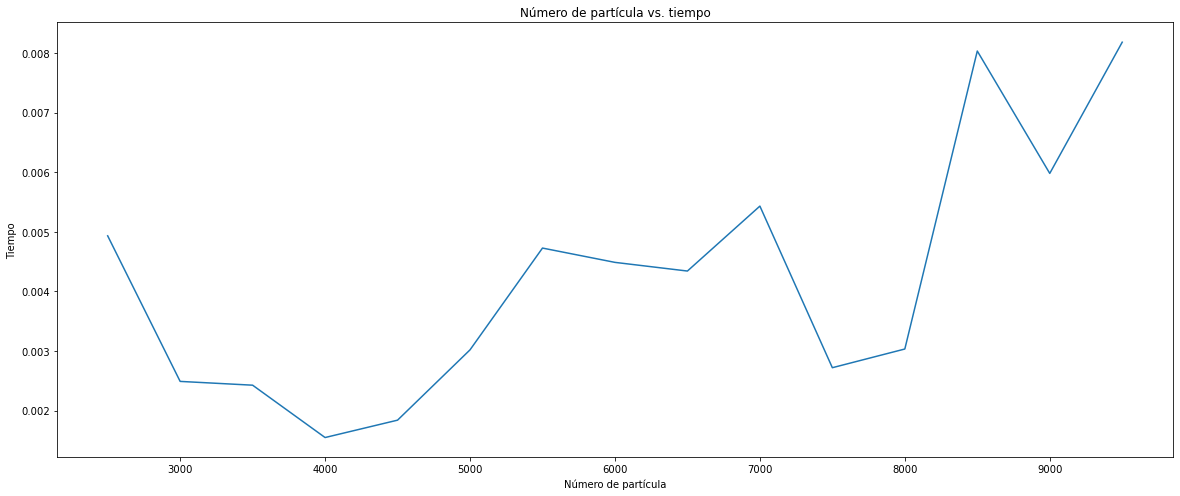

In [45]:
plt.figure(figsize=(20,8))
plt.plot(x, y)
plt.title('Número de partícula vs. tiempo')
plt.xlabel('Número de partícula')
plt.ylabel('Tiempo')
plt.show()